In [62]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import io
from scipy import stats

1- DF inflacion

In [63]:
df_remesas = pd.read_csv("ETL ADA\df_remesas.csv")

In [64]:
df_remesas

,country,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Antigua y Barbuda,1.583176,1.593232,1.681855,1.758306,1.783751,1.738093,1.788259,2.566805,2.337442,1.858969,1.636268,2.040436,2.185159,2.643288,3.076953
1,Argentina,0.210934,0.195029,0.188765,0.152091,0.131541,0.105779,0.096917,0.096015,0.083133,0.070234,0.074567,0.099547,0.125381,0.168859,0.187098
2,Bahamas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Barbados,2.966923,2.114153,2.563477,1.807287,3.162361,3.304049,4.083205,4.018380,4.191561,3.259159,1.709814,0.000000,0.000000,0.000000,NaN
4,Belice,4.311277,4.423887,4.675894,4.494367,4.139794,3.990838,3.666012,3.757456,3.833706,4.280319,3.946392,3.996231,4.006487,5.802097,5.432868
5,Bolivia,8.043840,6.805184,6.101098,4.886671,4.352523,4.100250,3.918348,3.566976,3.608943,3.672933,3.753794,3.445924,3.265949,3.075410,3.506962
6,Brasil,0.236614,0.214797,0.173313,0.139565,0.122873,0.112935,0.109902,0.107814,0.160742,0.152575,0.130786,0.153029,0.171551,0.246191,0.254945
7,Canadá,0.080165,0.083672,0.087038,0.074144,0.068440,0.068619,0.072378,0.074833,0.081866,0.084380,0.076894,0.075091,0.075303,0.049947,0.041819
8,Chile,0.000000,0.000000,0.030300,0.028707,0.028229,0.026960,0.025649,0.023366,0.024327,0.025893,0.024077,0.023648,0.024902,0.028065,0.022050
9,Colombia,2.163234,1.993027,1.774914,1.406617,1.224479,1.083430,1.164523,1.093046,1.704227,1.835749,1.865687,1.997341,2.202139,2.561793,2.737441


In [65]:
df_remesas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  33 non-null     object 
 1   2007     31 non-null     float64
 2   2008     31 non-null     float64
 3   2009     31 non-null     float64
 4   2010     31 non-null     float64
 5   2011     31 non-null     float64
 6   2012     31 non-null     float64
 7   2013     31 non-null     float64
 8   2014     31 non-null     float64
 9   2015     30 non-null     float64
 10  2016     30 non-null     float64
 11  2017     30 non-null     float64
 12  2018     30 non-null     float64
 13  2019     30 non-null     float64
 14  2020     30 non-null     float64
 15  2021     29 non-null     float64
dtypes: float64(15), object(1)
memory usage: 4.2+ KB


In [66]:
#Contamos los nulos por columnas, 
print(df_remesas.isna().sum(axis=0))

country    0
2007       2
2008       2
2009       2
2010       2
2011       2
2012       2
2013       2
2014       2
2015       3
2016       3
2017       3
2018       3
2019       3
2020       3
2021       4
dtype: int64


In [67]:
# analisis de distribucion

In [68]:
# histogramas



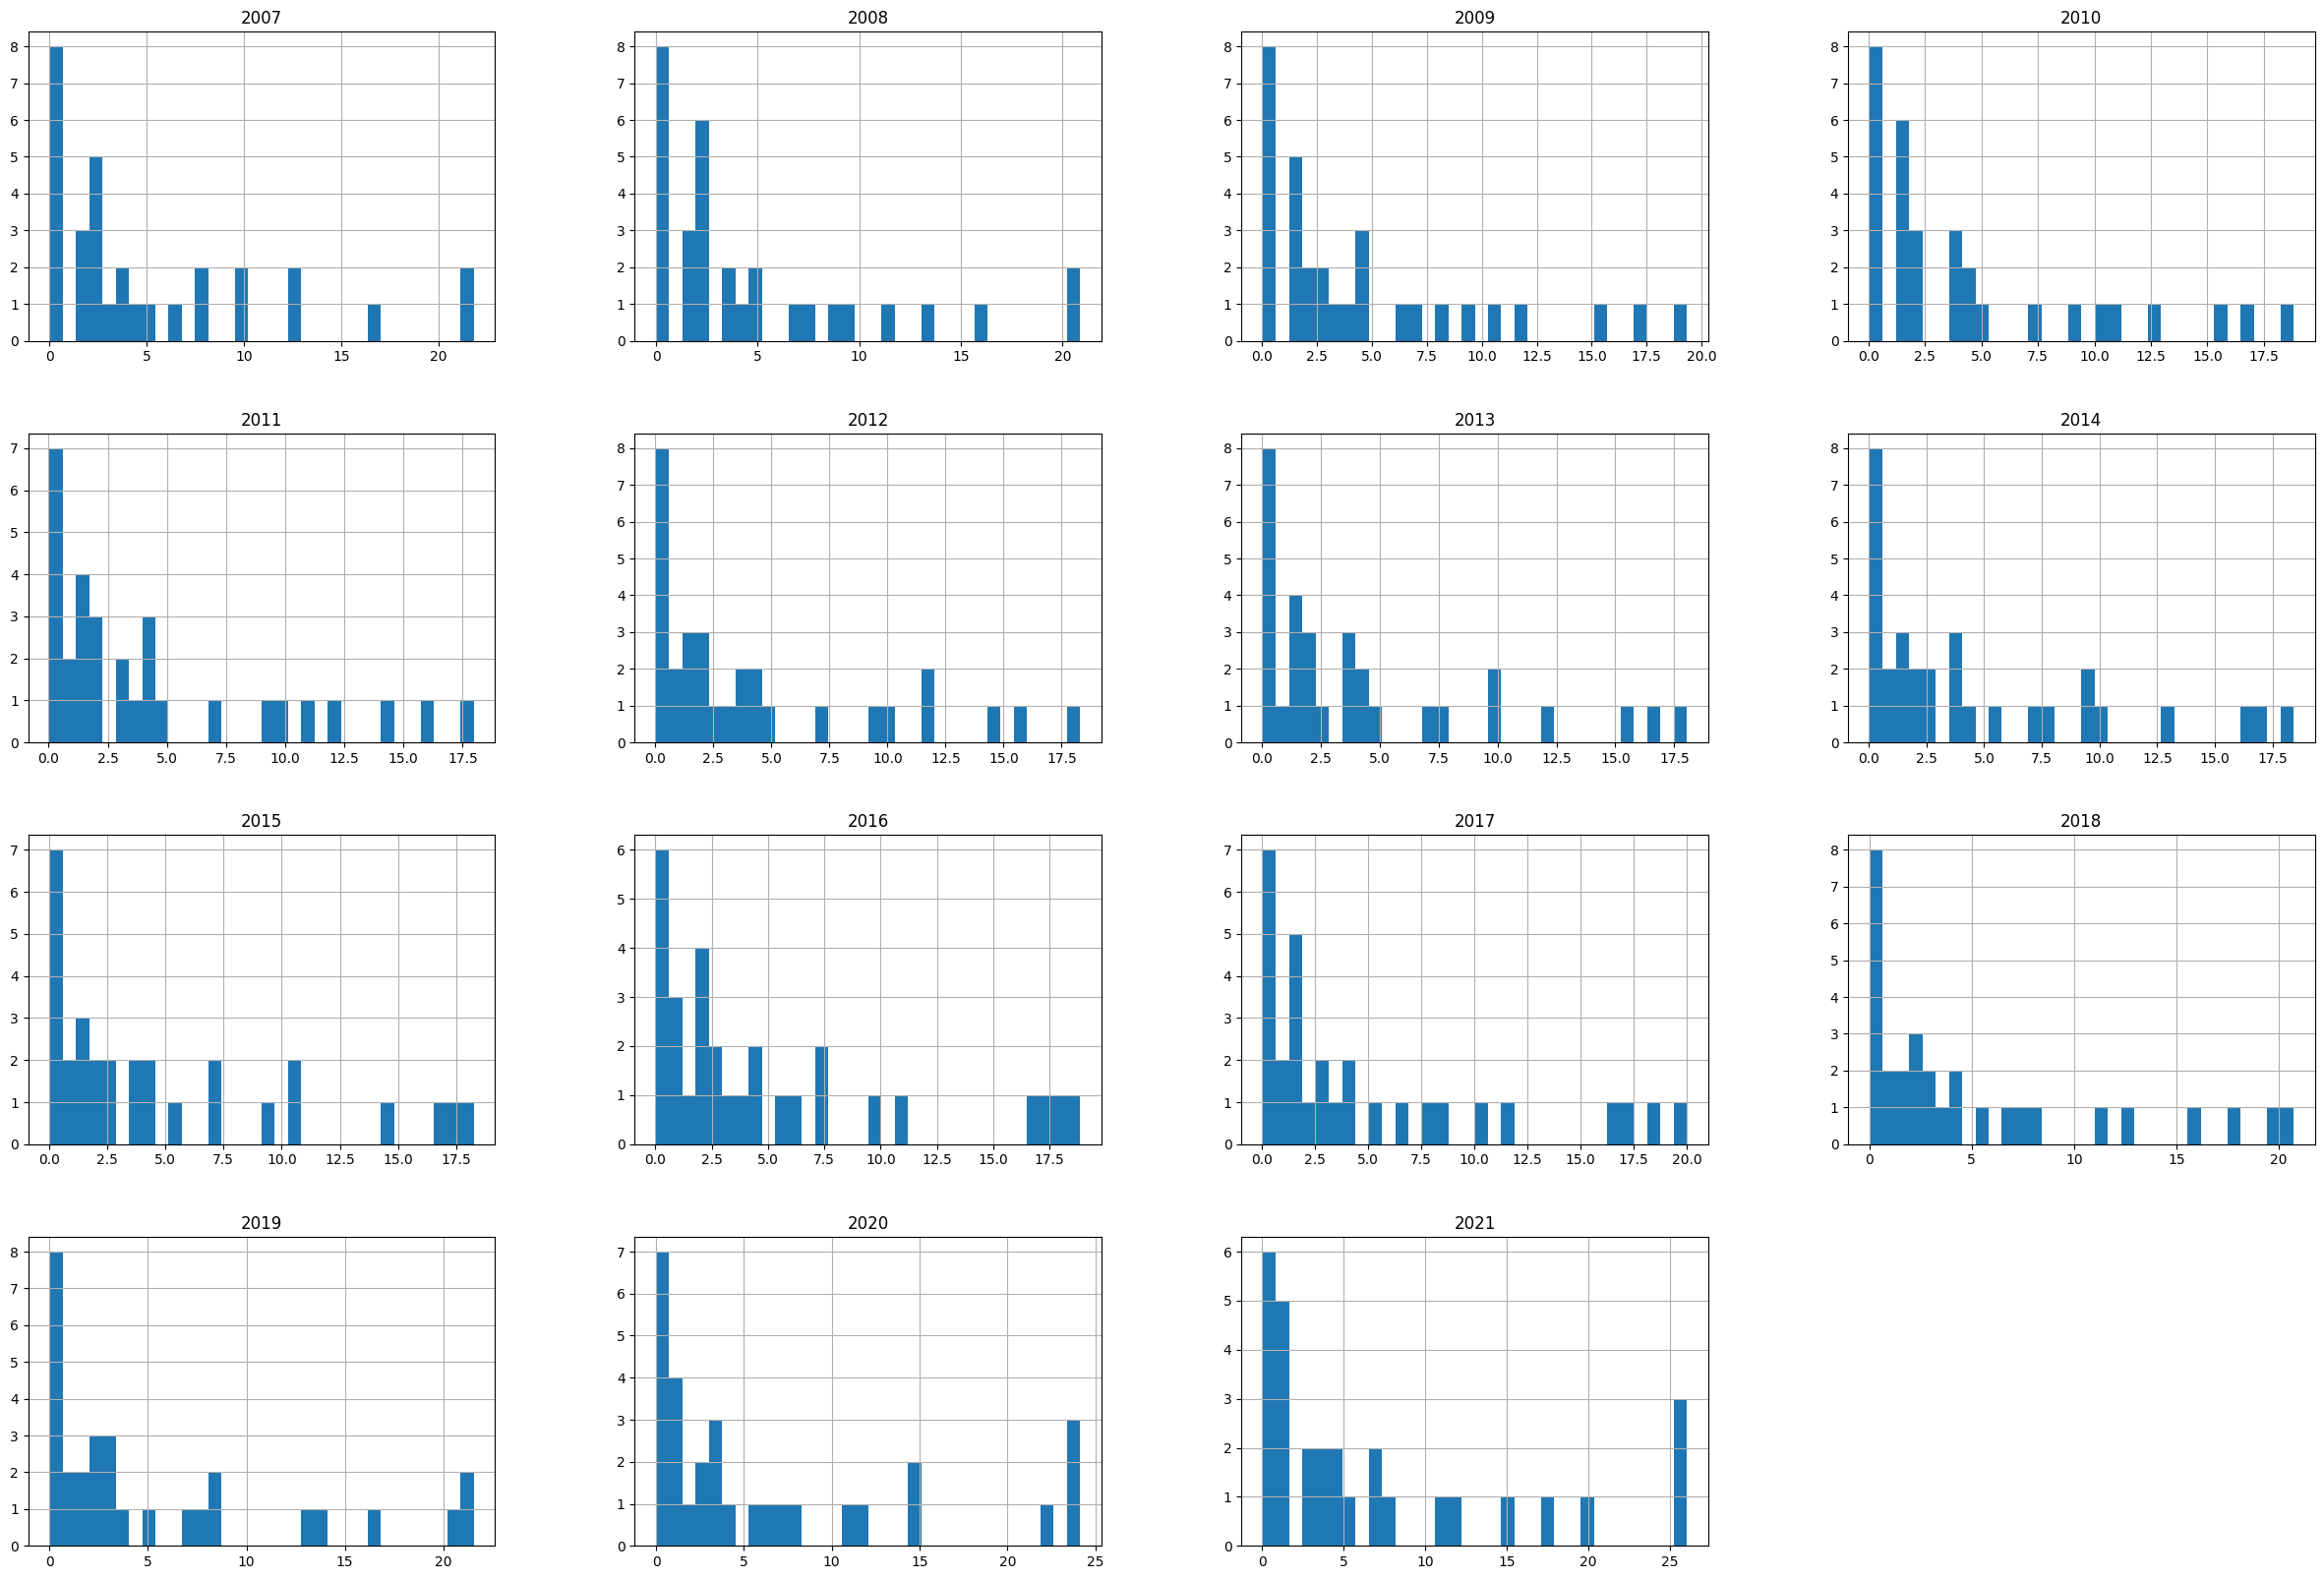

In [69]:
df_remesas.hist(bins=32, figsize=(30,20))
plt.show()

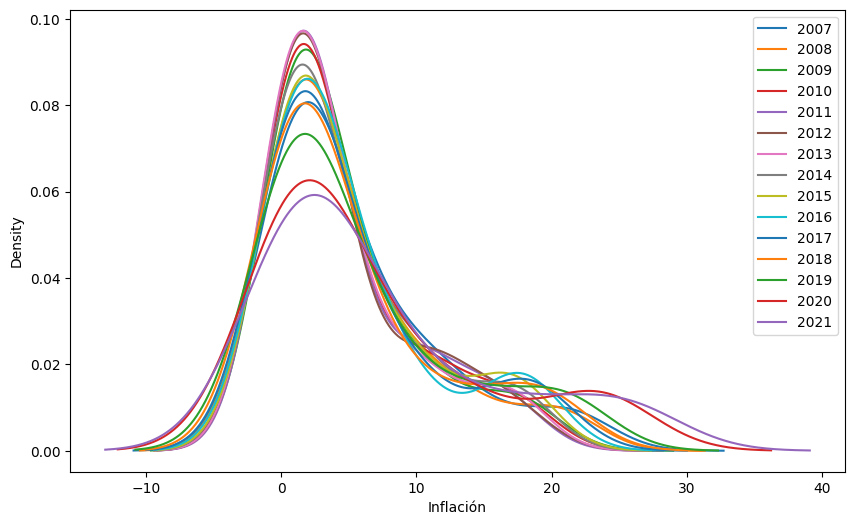

In [70]:


fig, ax = plt.subplots(figsize=(10,6))
df_remesas.plot(kind='density', ax=ax)
ax.set_xlabel('Inflación')
plt.show()

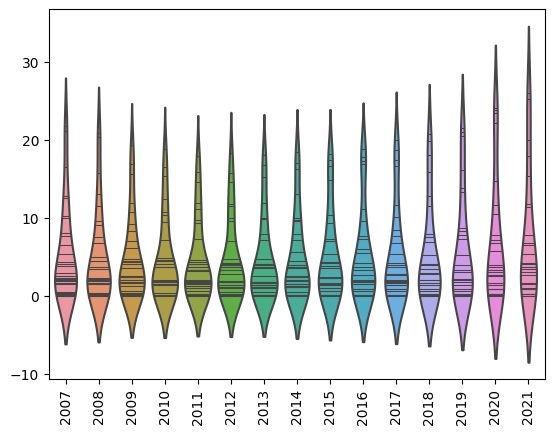

In [71]:
# Crear la gráfica de violín con los datos rotados del eje X
ax = sns.violinplot(data=df_remesas.drop(columns='country'), inner='stick')
plt.xticks(rotation=90)
plt.show()

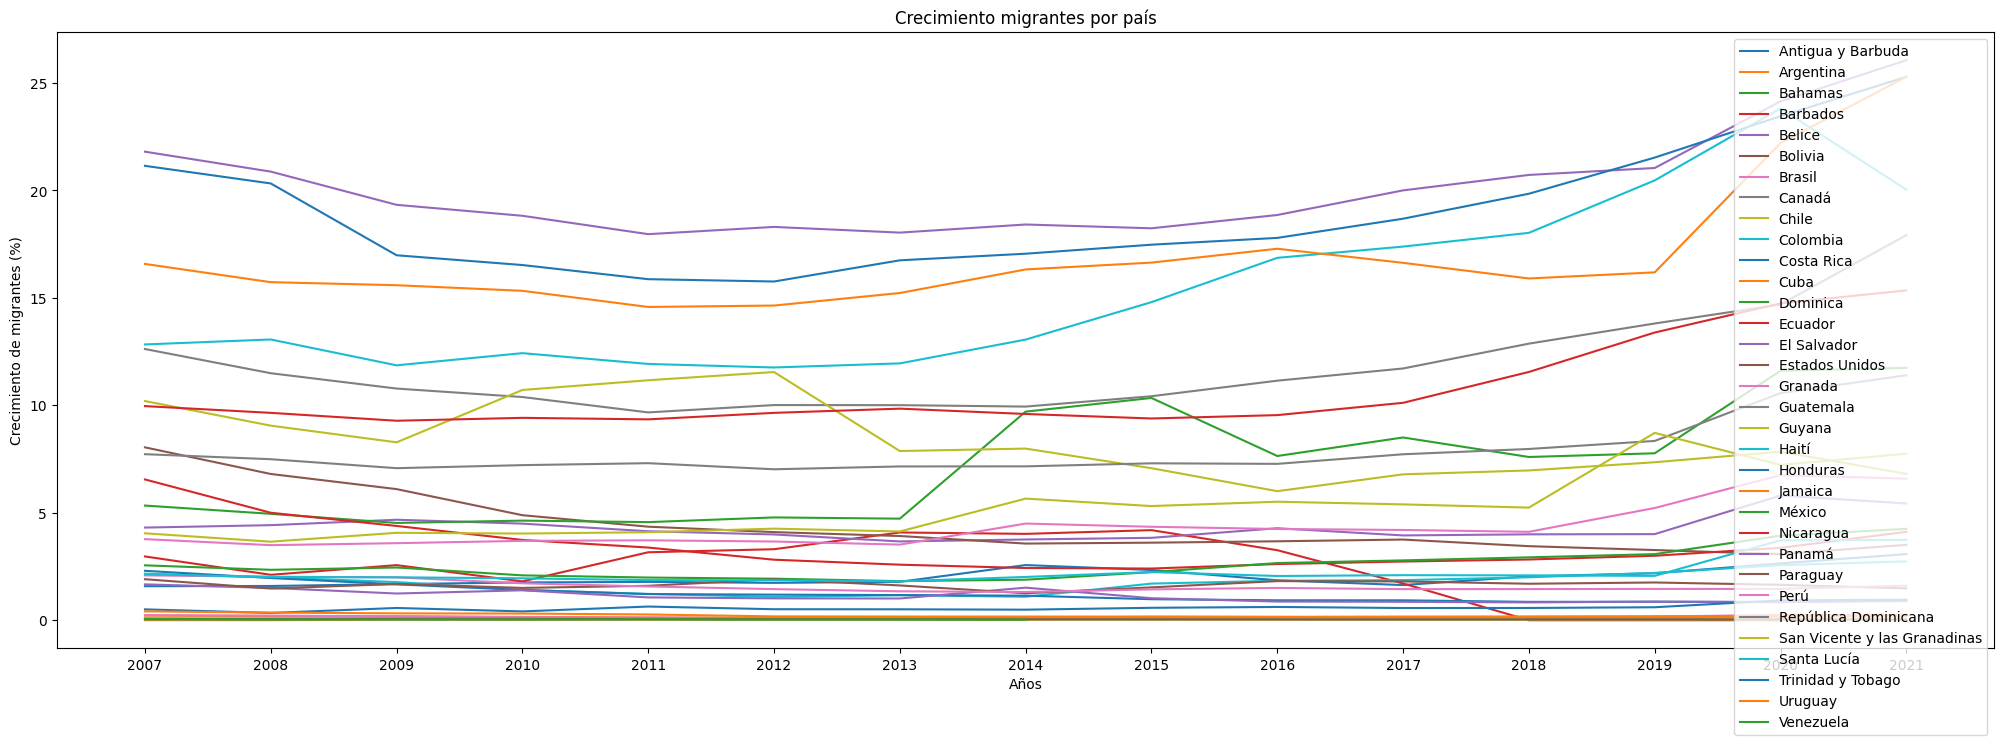

In [72]:
#diagrama de lineas 

fig, ax = plt.subplots(figsize=(25,8))

for country in df_remesas['country']:
    ax.plot(df_remesas.columns[1:], df_remesas[df_remesas['country'] == country].values[0][1:], label=country)

ax.legend()
ax.set_xlabel('Años')
ax.set_ylabel('Crecimiento de migrantes (%)')
ax.set_title('Crecimiento migrantes por país')
plt.show()

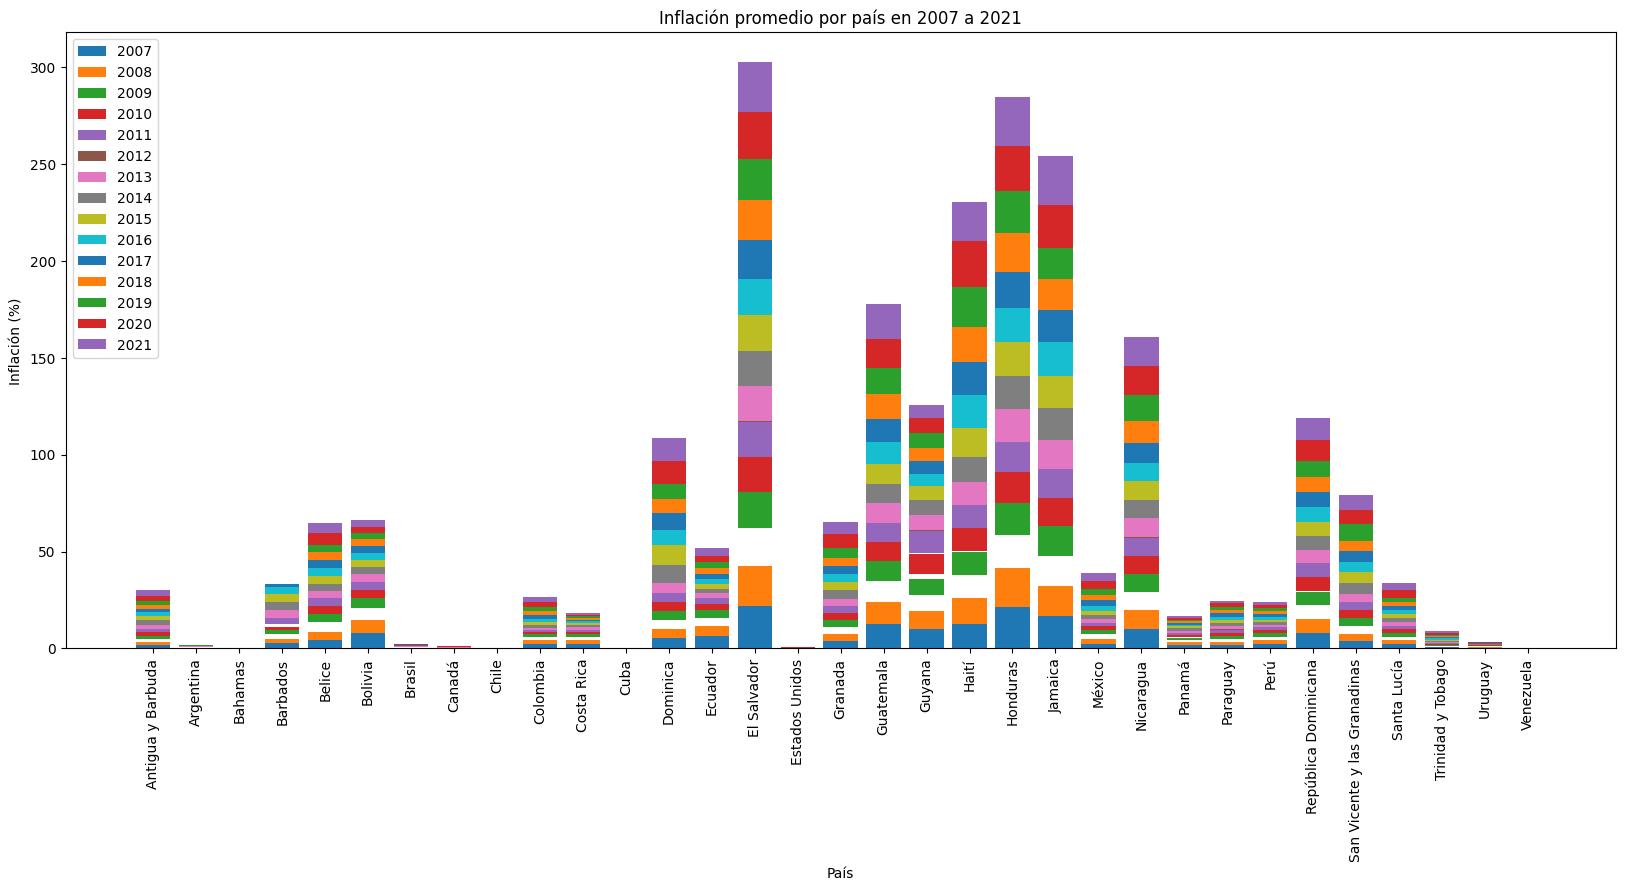

In [73]:
# diagrama de barras 


# calcular la inflación promedio de cada país en los años 2007 - 2021
inflacion_anual = df_remesas[['country', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']].groupby('country').mean().reset_index()

# crear el gráfico de barras apiladas
fig, ax = plt.subplots(figsize=(20,8))
ax.bar(inflacion_anual['country'], inflacion_anual['2007'], label='2007')
ax.bar(inflacion_anual['country'], inflacion_anual['2008'], bottom=inflacion_anual['2007'], label='2008')
ax.bar(inflacion_anual['country'], inflacion_anual['2009'], bottom=inflacion_anual['2007']+inflacion_anual['2008']+inflacion_anual['2009'], label='2009')
ax.bar(inflacion_anual['country'], inflacion_anual['2010'], bottom=inflacion_anual['2007']+inflacion_anual['2008']+inflacion_anual['2009']+inflacion_anual['2010'], label='2010')
ax.bar(inflacion_anual['country'], inflacion_anual['2011'], bottom=inflacion_anual['2007']+inflacion_anual['2008']+inflacion_anual['2009']+inflacion_anual['2010']+inflacion_anual['2011'], label='2011')
ax.bar(inflacion_anual['country'], inflacion_anual['2012'], bottom=inflacion_anual['2007']+inflacion_anual['2008']+inflacion_anual['2009']+inflacion_anual['2010']+inflacion_anual['2011']+inflacion_anual['2011'], label='2012')
ax.bar(inflacion_anual['country'], inflacion_anual['2013'], bottom=inflacion_anual['2007']+inflacion_anual['2008']+inflacion_anual['2009']+inflacion_anual['2010']+inflacion_anual['2011']+inflacion_anual['2012'], label='2013')
ax.bar(inflacion_anual['country'], inflacion_anual['2014'], bottom=inflacion_anual['2007']+inflacion_anual['2008']+inflacion_anual['2009']+inflacion_anual['2010']+inflacion_anual['2011']+inflacion_anual['2012']+inflacion_anual['2013'], label='2014')
ax.bar(inflacion_anual['country'], inflacion_anual['2015'], bottom=inflacion_anual['2007']+inflacion_anual['2008']+inflacion_anual['2009']+inflacion_anual['2010']+inflacion_anual['2011']+inflacion_anual['2012']+inflacion_anual['2013']+inflacion_anual['2014'], label='2015')
ax.bar(inflacion_anual['country'], inflacion_anual['2016'], bottom=inflacion_anual['2007']+inflacion_anual['2008']+inflacion_anual['2009']+inflacion_anual['2010']+inflacion_anual['2011']+inflacion_anual['2012']+inflacion_anual['2013']+inflacion_anual['2014']+inflacion_anual['2015'], label='2016')
ax.bar(inflacion_anual['country'], inflacion_anual['2017'], bottom=inflacion_anual['2007']+inflacion_anual['2008']+inflacion_anual['2009']+inflacion_anual['2010']+inflacion_anual['2011']+inflacion_anual['2012']+inflacion_anual['2013']+inflacion_anual['2014']+inflacion_anual['2015']+inflacion_anual['2016'], label='2017')
ax.bar(inflacion_anual['country'], inflacion_anual['2018'], bottom=inflacion_anual['2007']+inflacion_anual['2008']+inflacion_anual['2009']+inflacion_anual['2010']+inflacion_anual['2011']+inflacion_anual['2012']+inflacion_anual['2013']+inflacion_anual['2014']+inflacion_anual['2015']+inflacion_anual['2016']+inflacion_anual['2017'], label='2018')
ax.bar(inflacion_anual['country'], inflacion_anual['2019'], bottom=inflacion_anual['2007']+inflacion_anual['2008']+inflacion_anual['2009']+inflacion_anual['2010']+inflacion_anual['2011']+inflacion_anual['2012']+inflacion_anual['2013']+inflacion_anual['2014']+inflacion_anual['2015']+inflacion_anual['2016']+inflacion_anual['2017']+inflacion_anual['2018'], label='2019')
ax.bar(inflacion_anual['country'], inflacion_anual['2020'], bottom=inflacion_anual['2007']+inflacion_anual['2008']+inflacion_anual['2009']+inflacion_anual['2010']+inflacion_anual['2011']+inflacion_anual['2012']+inflacion_anual['2013']+inflacion_anual['2014']+inflacion_anual['2015']+inflacion_anual['2016']+inflacion_anual['2017']+inflacion_anual['2018']+inflacion_anual['2019'], label='2020')
ax.bar(inflacion_anual['country'], inflacion_anual['2021'], bottom=inflacion_anual['2007']+inflacion_anual['2008']+inflacion_anual['2009']+inflacion_anual['2010']+inflacion_anual['2011']+inflacion_anual['2012']+inflacion_anual['2013']+inflacion_anual['2014']+inflacion_anual['2015']+inflacion_anual['2016']+inflacion_anual['2017']+inflacion_anual['2018']+inflacion_anual['2019']+inflacion_anual['2020'], label='2021')


# personalizar el gráfico
ax.set_xlabel('País')
ax.set_ylabel('Inflación (%)')
ax.set_title('Inflación promedio por país en 2007 a 2021')
ax.legend()

ax.tick_params(axis='x', labelrotation=90)

# mostrar el gráfico
plt.show()

In [74]:
# analisis de outliers

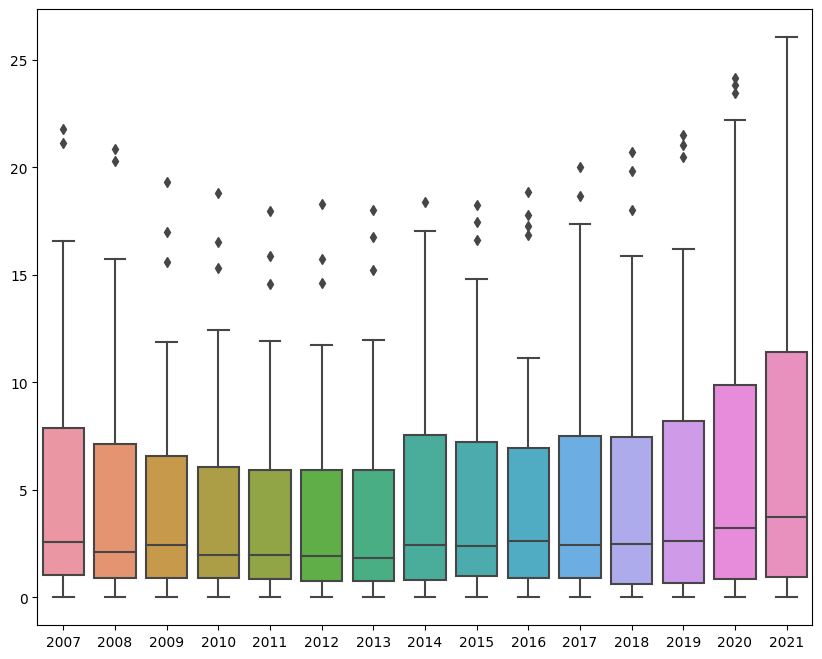

In [75]:
# Creamos un boxplot de Seaborn:

plt.figure(figsize=(10, 8))

sns.boxplot(data=df_remesas.iloc[:,1:])

# Mostramos el gráfico:

plt.show()

In [76]:


# Definimos una función para encontrar outliers
def find_outliers(data):
    # Calculamos el rango intercuartílico
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    
    # Calculamos los límites del bigote
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Encontramos los outliers
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    
    # Devolvemos los outliers
    return outliers

# Buscamos los outliers en cada columna del DataFrame
for col in df_remesas.columns[1:]:
    outliers = find_outliers(df_remesas[col])
    print("Outliers en la columna", col, ":", outliers.values)

    

Outliers en la columna 2007 : [21.80287154 21.14384094]
Outliers en la columna 2008 : [20.87492613 20.32419598]
Outliers en la columna 2009 : [19.32969806 16.98262054 15.58929457]
Outliers en la columna 2010 : [18.81966487 16.52787351 15.32799142]
Outliers en la columna 2011 : [17.96484307 15.86980545 14.57706478]
Outliers en la columna 2012 : [18.30179127 15.7614147  14.64256069]
Outliers en la columna 2013 : [18.03685945 16.7475021  15.22614044]
Outliers en la columna 2014 : [18.41407274]
Outliers en la columna 2015 : [18.23780572 17.47493759 16.64137384]
Outliers en la columna 2016 : [18.85618201 16.86215247 17.79080208 17.28638122]
Outliers en la columna 2017 : [20.0020639  18.68394806]
Outliers en la columna 2018 : [20.72084003 18.02632497 19.84622674]
Outliers en la columna 2019 : [21.04358007 20.46653853 21.52838034]
Outliers en la columna 2020 : [24.14531176 23.81600439 23.45427169]
Outliers en la columna 2021 : []


In [77]:
def find_outliers(data):
    # Calculamos el rango intercuartílico
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    
    # Calculamos los límites del bigote
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Encontramos los outliers y sus índices correspondientes
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    outlier_indices = outliers.index
    
    # Devolvemos los outliers y sus índices correspondientes
    return outliers, outlier_indices

In [78]:
for col in df_remesas.columns[1:]:
    outliers, outlier_indices = find_outliers(df_remesas[col])
    print("Outliers en la columna", col)
    print("Valores:", outliers.values)
    print("Índices:", outlier_indices.values)
    print("Países:", df_remesas.loc[outlier_indices]['country'].values)
    print("")

Outliers en la columna 2007
Valores: [21.80287154 21.14384094]
Índices: [14 20]
Países: ['El Salvador' 'Honduras']

Outliers en la columna 2008
Valores: [20.87492613 20.32419598]
Índices: [14 20]
Países: ['El Salvador' 'Honduras']

Outliers en la columna 2009
Valores: [19.32969806 16.98262054 15.58929457]
Índices: [14 20 21]
Países: ['El Salvador' 'Honduras' 'Jamaica']

Outliers en la columna 2010
Valores: [18.81966487 16.52787351 15.32799142]
Índices: [14 20 21]
Países: ['El Salvador' 'Honduras' 'Jamaica']

Outliers en la columna 2011
Valores: [17.96484307 15.86980545 14.57706478]
Índices: [14 20 21]
Países: ['El Salvador' 'Honduras' 'Jamaica']

Outliers en la columna 2012
Valores: [18.30179127 15.7614147  14.64256069]
Índices: [14 20 21]
Países: ['El Salvador' 'Honduras' 'Jamaica']

Outliers en la columna 2013
Valores: [18.03685945 16.7475021  15.22614044]
Índices: [14 20 21]
Países: ['El Salvador' 'Honduras' 'Jamaica']

Outliers en la columna 2014
Valores: [18.41407274]
Índices: [14

In [79]:
# Comprender la causa de los outliers:



In [80]:
# matriz de correlacion 

In [81]:
#convertimos en datos numericos las columnas en string que vamos a necesitar.
from sklearn import preprocessing 
le = preprocessing.LabelEncoder()

In [82]:
#analizamos la correlacion entre las features (tabla matriz de correlacion)

df_remesas_corr = df_remesas.corr()

C:\Users\alekz\AppData\Local\Temp\ipykernel_31684\2011710272.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_remesas_corr = df_remesas.corr()


In [83]:
# visualizo
df_remesas_corr

,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
2007,1.000000,0.997966,0.994705,0.987712,0.982525,0.978685,0.982150,0.959275,0.951159,0.955885,0.959639,0.958689,0.940348,0.932889,0.948642
2008,0.997966,1.000000,0.996635,0.990905,0.984959,0.981126,0.987177,0.965795,0.959659,0.966672,0.970764,0.971146,0.953856,0.948076,0.958637
2009,0.994705,0.996635,1.000000,0.994279,0.989464,0.986603,0.992166,0.971864,0.965096,0.972687,0.973540,0.971219,0.954401,0.952681,0.966273
2010,0.987712,0.990905,0.994279,1.000000,0.997780,0.996234,0.990376,0.972875,0.963746,0.968375,0.971967,0.971013,0.956112,0.954466,0.959176
2011,0.982525,0.984959,0.989464,0.997780,1.000000,0.999305,0.991193,0.973793,0.963567,0.964660,0.966646,0.963465,0.949764,0.947482,0.954287
2012,0.978685,0.981126,0.986603,0.996234,0.999305,1.000000,0.990354,0.974065,0.963006,0.962461,0.964673,0.961366,0.947997,0.944946,0.953004
2013,0.982150,0.987177,0.992166,0.990376,0.991193,0.990354,1.000000,0.984486,0.978880,0.982307,0.980131,0.975489,0.962853,0.962411,0.979516
2014,0.959275,0.965795,0.971864,0.972875,0.973793,0.974065,0.984486,1.000000,0.997092,0.986332,0.985709,0.974238,0.964401,0.974154,0.985118
2015,0.951159,0.959659,0.965096,0.963746,0.963567,0.963006,0.978880,0.997092,1.000000,0.992327,0.990997,0.978917,0.969349,0.981727,0.988887
2016,0.955885,0.966672,0.972687,0.968375,0.964660,0.962461,0.982307,0.986332,0.992327,1.000000,0.997289,0.989821,0.982850,0.990120,0.991019


<AxesSubplot: >

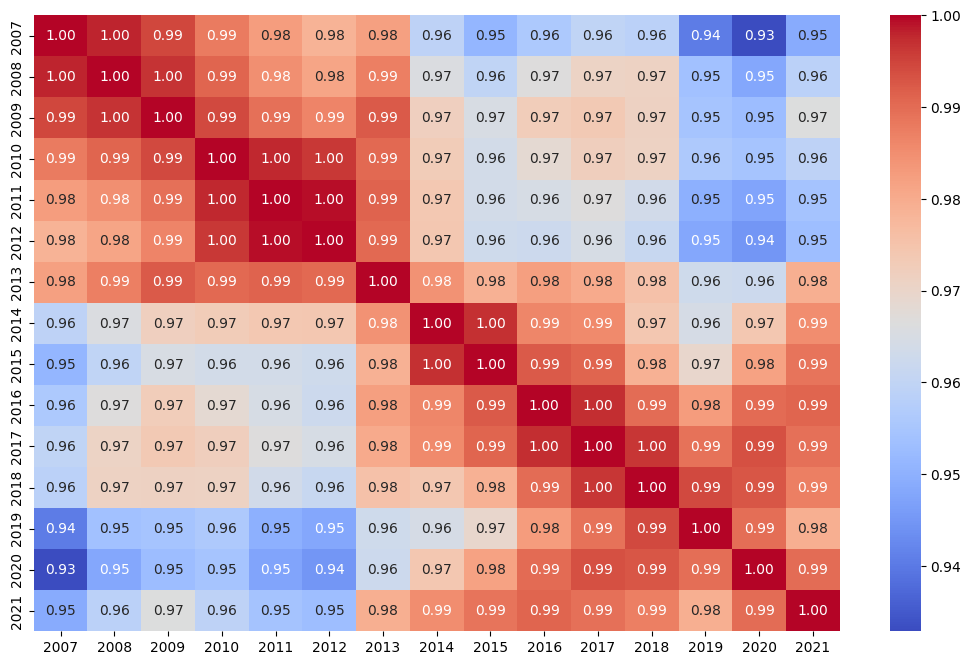

In [84]:
#Graficamos las correlaciones con un mapa de calor

plt.figure(figsize=(13,8))
sns.heatmap(df_remesas_corr, cbar = True,  square = False, annot=True, fmt= '.2f',cmap= 'coolwarm') 

In [85]:
# Resumen de atributos numéricos para variables continuas
df_remesas.describe()

,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
count,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,29.000000
mean,5.349727,4.977505,4.678505,4.598036,4.480430,4.479494,4.395408,4.741504,5.000262,5.022250,5.125826,5.202933,5.659244,6.619841,7.161922
std,6.126346,5.877795,5.324828,5.354567,5.148424,5.215538,5.209135,5.458850,5.615448,5.827167,6.073615,6.340704,6.822223,7.926485,8.369673
min,0.000000,0.000000,0.030300,0.028707,0.028229,0.026960,0.025649,0.023366,0.024327,0.025893,0.024077,0.000000,0.000000,0.000000,0.022050
25%,1.044342,0.914280,0.906438,0.901443,0.848927,0.764022,0.760023,0.792089,0.989621,0.882557,0.874581,0.634819,0.667644,0.844273,0.924250
50%,2.553430,2.114153,2.452736,1.950126,1.986096,1.932299,1.819525,2.430491,2.371031,2.636998,2.414158,2.455941,2.600813,3.221489,3.741397
75%,7.885184,7.148757,6.588289,6.051753,5.936233,5.903739,5.941137,7.573518,7.244834,6.958307,7.489016,7.439615,8.199519,9.886137,11.398988
max,21.802872,20.874926,19.329698,18.819665,17.964843,18.301791,18.036859,18.414073,18.237806,18.856182,20.002064,20.720840,21.528380,24.145312,26.058687
